In [90]:
#importing python libraries
import pandas as pd
import numpy as np

In [91]:
#reading the dataset csv file details
housing_df = pd.read_csv(r'E:\upgrad\train.csv')

In [92]:
housing_df.shape 

(1460, 81)

we have 1460 rows and 81 columns in the dataset

# Data cleaning and preparation

In [93]:
#checking for null values
#pd.options.display.max_colwidth = 300
pd.options.display.max_rows = 300  #for better data visibility to know which columns has how many null values

housing_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

we have few columns with significant count of null values present
Alley,           
PoolQC,           
Fence,            
MiscFeature,      
FireplaceQu,       
LotFrontage,       

In [94]:
#before dropping any columns since we have NA in data dictionary replacing replacing relevant values
housing_df['Alley'].fillna('No Alley',inplace=True)
housing_df['FireplaceQu'].fillna('No Fireplace',inplace=True)
housing_df['PoolQC'].fillna('No Pool',inplace=True)
housing_df['Fence'].fillna('No Fence',inplace=True)

In [95]:
for colm in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    housing_df[colm].fillna('No Basement',inplace=True)
for colm in ['GarageType','GarageFinish','GarageQual','GarageCond','BsmtFinType2']:
    housing_df[colm].fillna('No Garage',inplace=True)

In [96]:
housing_df.shape 

(1460, 81)

In [97]:
#re-visiting the null values after replacing relevant NA values 
housing_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [98]:
#dropping now null values and Id column since it doesn't add any value in analysis as it is unique value
housing_df.drop(['GarageYrBlt','MiscFeature','LotFrontage','Id','MasVnrType','MasVnrArea'],axis=1,inplace=True)
housing_df.shape 

(1460, 75)

In [99]:
housing_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces  

there aren't any significant null values anymore

In [100]:
#continuous_variables = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       #'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
      # 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
      # 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
     #  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
      # 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
      # 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [101]:
#categorical_variables = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    #   'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    #   'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
     #  'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
    #   'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    #   'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
    #   'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
     #  'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType',
     #  'SaleCondition']

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.rcParams.update({'figure.max_open_warning': 0})


<BarContainer object of 1460 artists>

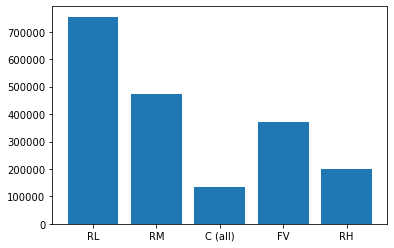

In [103]:
plt.bar(housing_df['MSZoning'],housing_df['SalePrice'])

Residential Low Density is price is higher followed by Residential Medium Density and Floating Village Residential

<BarContainer object of 1460 artists>

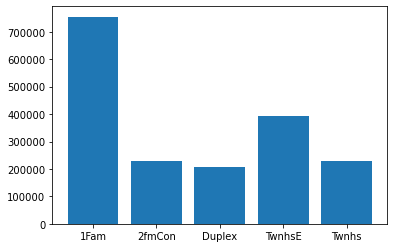

In [104]:
plt.bar(housing_df['BldgType'],housing_df['SalePrice'])

Single family detached typed of buidling sale price is higher

<BarContainer object of 1460 artists>

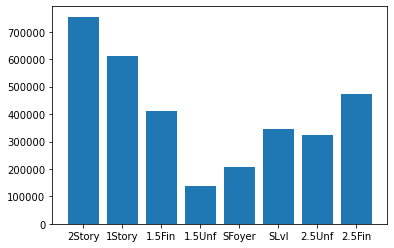

In [105]:
plt.bar(housing_df['HouseStyle'],housing_df['SalePrice'])

2 storey type of house sale price is higher

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

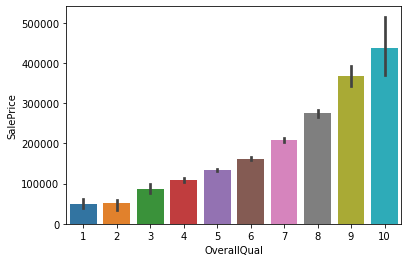

In [106]:
sns.barplot(x=housing_df['OverallQual'],y=housing_df['SalePrice'],data=housing_df)

Obviously over-call higher quality of the house attracts higher sale price

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

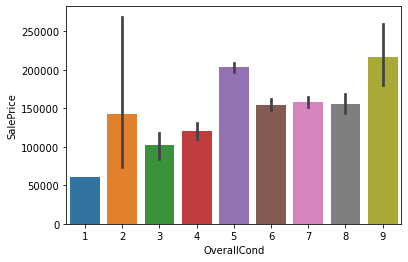

In [107]:
sns.barplot(x=housing_df['OverallCond'],y=housing_df['SalePrice'],data=housing_df)

surprisingly over-all condition of the house attracts higher and average rating sale price i higher comparatively

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

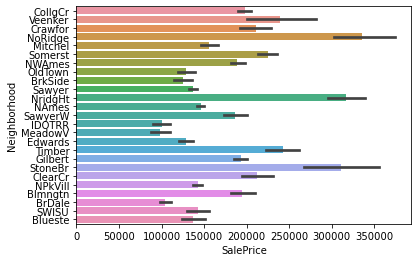

In [108]:
sns.barplot(x=housing_df['SalePrice'],y=housing_df['Neighborhood'],data=housing_df)

Neighborhood areas is also a factor to attract higher sale prices like Brookside,Northridge,Stone Brook from above plot

<AxesSubplot:>

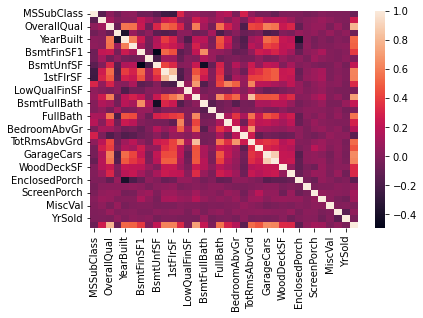

In [109]:
sns.heatmap(housing_df.corr())
#plt.figure(figsize=(16,8))

In [110]:
#separating continuous and categorical variables 

categorical_values=[]
numerical_values=[]

for colm in list(housing_df):
    if housing_df[colm].dtype !='object':
        numerical_values.append(colm)
    else:
        categorical_values.append(colm)
    
print(categorical_values)
print(numerical_values)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Y

In [111]:
#Checking for outliers if exist and deleting outliers with greater than +3 Standard Deviation or less than -3 Standard Deviation 

from scipy import stats

Z_score = np.abs(stats.zscore(housing_df[numerical_values]))

outliers = housing_df[numerical_values][(Z_score).all(axis=1)]

housing_df = housing_df.loc[outliers.index]
housing_df

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,No Pool,No Fence,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,No Pool,No Fence,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,No Pool,No Fence,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,No Pool,No Fence,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,No Pool,No Fence,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,No Pool,No Fence,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,No Pool,MnPrv,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,No Pool,GdPrv,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,No Pool,No Fence,0,4,2010,WD,Normal,142125


In [112]:
#generate dummies for categorical variables

dummy_housing_df = pd.get_dummies(housing_df[categorical_values],drop_first=True)

In [113]:
#combine dummies dataframe with original dataframe

combined_df=pd.concat([housing_df,dummy_housing_df],axis=1)
combined_df.shape   #we now have 1460 rows and 296 columns after combining dummy variables with original datase

(1460, 291)

In [114]:
#now we can drop actual categorical columns from which dummy variables are created

housing_new_df = combined_df.drop(categorical_values,axis=1)
housing_new_df.shape  #we now have 1460 rows and 254 columns after dropping actual categorical columns

(1460, 250)

# Splitting test & train dataset

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
#defining target and predictor variables
y=housing_new_df['SalePrice']
X=housing_new_df.drop('SalePrice',axis=1)

In [117]:
#deriving test & train dataset for target and predictors
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
#I have chosen to train-test percent to be 70-30 which is widely used (it can also be 80-20 based on on our choice)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1021, 249) (438, 249) (1021,) (438,)


In [118]:
#scaling independent variables
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

scaling = StandardScaler()

numerical_values.remove('SalePrice')

X_train[numerical_values]=scaling.fit_transform(X_train[numerical_values])
X_test[numerical_values]=scaling.transform(X_test[numerical_values])

X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,-0.868006,-0.031106,0.636468,0.391626,-0.031237,-0.710647,-0.971407,-0.280483,1.647353,0.546680,...,0,0,0,0,1,0,0,0,1,0
1452,2.885732,-0.624789,-0.822194,-0.508937,1.107784,0.977287,0.218347,-0.280483,-1.281026,-1.145636,...,0,0,0,0,1,0,0,0,1,0
762,0.070429,-0.186479,0.636468,-0.508937,1.237958,1.170193,-0.919206,-0.280483,0.362819,-0.678405,...,0,0,0,0,0,0,0,0,1,0
932,-0.868006,0.081010,2.095130,-0.508937,1.140328,1.025513,-0.971407,-0.280483,2.997013,1.890249,...,0,0,0,0,1,0,0,0,1,0
435,0.070429,-0.007535,0.636468,0.391626,0.814893,0.543247,-0.134012,1.994578,-1.123828,-0.582276,...,0,1,0,0,0,0,0,0,1,0


In [119]:
#importing required model buildling libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

In [120]:
#performing simple linear regression

reg_model = LinearRegression()

reg_model.fit(X_train,y_train)

#performing RFE

rfe_model = RFE(reg_model,50)
rfe_model.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [121]:
cols=X_train.columns[rfe_model.support_]
cols

Index(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PoolArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandContour_HLS', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition2_PosN', 'BldgType_Duplex',
       'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA',
       'BsmtCond_No Basement', 'BsmtExposure_No Basement',
       'BsmtFinType1_No Basement', 'BsmtFinType2_No Basement', 'Heating_OthW',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Sev',
       'Functional_Typ', 'GarageFinish_No Garage', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_No Garage', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po',
       'GarageCond_TA', 'PoolQC_Gd', 

In [122]:
# predict train
y_train_predict = reg_model.predict(X_train)
#print(metrics.r2_score(y_true=y_train, y_pred=y_train_predict))
# predict test
y_test_predict = reg_model.predict(X_test)
#print(metrics.r2_score(y_true=y_test, y_pred=y_test_predict))

In [123]:
RFE_scores = pd.DataFrame(list(zip(X_train.columns,rfe_model.support_,rfe_model.ranking_)))
RFE_scores.columns = ['Column_Names','Status','Rank']
RFE_selected_columns = list(RFE_scores[RFE_scores.Status==True].Column_Names)
RFE_selected_columns

['1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'PoolArea',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_HLS',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition2_PosN',
 'BldgType_Duplex',
 'RoofMatl_CompShg',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_CBlock',
 'Exterior2nd_CBlock',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_No Basement',
 'BsmtQual_TA',
 'BsmtCond_No Basement',
 'BsmtExposure_No Basement',
 'BsmtFinType1_No Basement',
 'BsmtFinType2_No Basement',
 'Heating_OthW',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Sev',
 'Functional_Typ',
 'GarageFinish_No Garage',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_No Garage',
 'GarageQual_Po',
 'GarageQual_TA',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'GarageCond_TA',
 'PoolQC_Gd',
 'PoolQC_No Pool',
 'SaleType_Con']

using simple linear regresssion, we listed significant columns 

# Ridge Regression

In [124]:
#import regression libraries
from sklearn.model_selection import GridSearchCV

In [125]:
# list of alphas values #hyper parameters
params = {'alpha': [0.001,0.01,0.05,0.1,0.5,1.0,5.0,10,50]}

ridge = Ridge() 

# cross validation using Grid Search CV
folds_count = 5

CV_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds_count, 
                        return_train_score=True,
                        verbose = 1)    

CV_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10,
                                   50]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [126]:
#looking at the cross validation values obtained in previous Ridge regression
CV_values = pd.DataFrame(CV_ridge.cv_results_)
CV_values.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040922,0.008263,0.014395,0.002167,0.001,{'alpha': 0.001},-17274.666590,-20359.726024,-19339.007821,-17702.537870,...,-19550.879365,2085.207330,4,-12209.448373,-11477.500223,-11571.985351,-12438.315762,-12202.565246,-11979.962991,382.417875
1,0.047464,0.002169,0.011335,0.005728,0.01,{'alpha': 0.01},-17249.179608,-21813.423494,-19124.154346,-18006.740902,...,-19782.495544,2133.167266,5,-12321.100900,-11775.589082,-11782.329646,-12672.053999,-12262.735868,-12162.761899,343.242179
2,0.046889,0.003773,0.011136,0.005649,0.05,{'alpha': 0.05},-17487.757796,-22608.581885,-18847.180388,-18546.529691,...,-19856.749308,1983.551042,6,-12813.675081,-11955.551692,-12216.378723,-13149.520373,-12551.013663,-12537.227906,422.565159
3,0.045006,0.007405,0.014663,0.001008,0.1,{'alpha': 0.1},-17782.799908,-22649.568402,-19019.843719,-19035.776104,...,-19936.667425,1745.590282,8,-13237.912437,-12049.788995,-12636.925067,-13569.787635,-12866.753685,-12872.233564,520.022674
4,0.045935,0.002142,0.012340,0.004708,0.5,{'alpha': 0.5},-18372.199556,-22269.309867,-19625.646398,-20033.258294,...,-20046.153368,1259.757784,9,-14308.649286,-12269.703090,-13894.968034,-14582.233642,-14175.711732,-13846.253157,818.767813


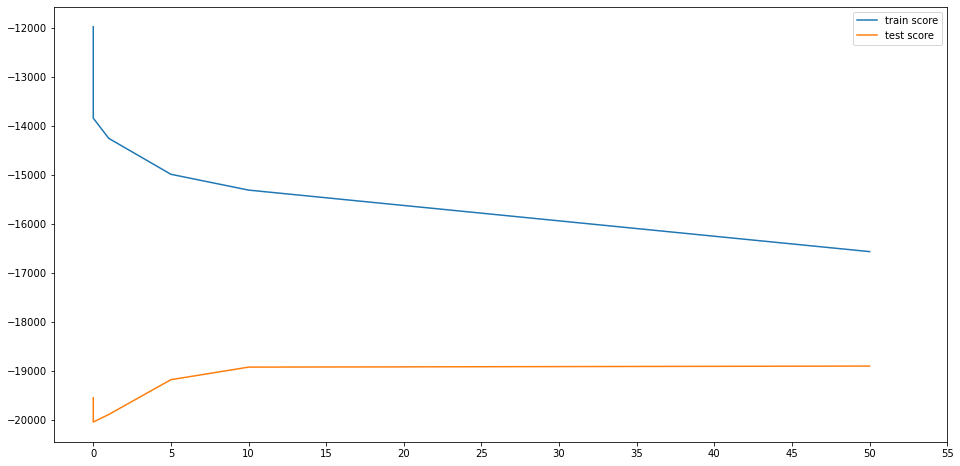

In [127]:
# plot a graph between mean test values and train scores with alpha 

CV_values['param_alpha'] = CV_values['param_alpha'].astype('int32')

plt.figure(figsize=(16,8))

plt.plot(CV_values['param_alpha'], CV_values['mean_train_score'])  #alpha vs mean train score values
plt.plot(CV_values['param_alpha'], CV_values['mean_test_score'])   #alpha vs mean test score values

plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0, 60, 5))
plt.show()

alpha value 5 is found to be good 

In [128]:
#fitting the model with alpha value obtained 5
ridge = Ridge(alpha=5)

ridge.fit(X_train, y_train)
#ridge.coef_

Ridge(alpha=5)

In [129]:
#find r2 value for train data set for predictors
y_train_predicts = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_predicts))

#find r2 value for train data set for predictors
y_test_predicts = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_predicts))

0.900392170676128
0.8750549140368067


Seems like the train & test r2 values are good.

In [130]:
#performing this step to answer subjective questions for doubling alpha values 

#fitting the model with alpha value doubled 10
ridge = Ridge(alpha=10)

ridge.fit(X_train, y_train)
#ridge.coef_

Ridge(alpha=10)

In [131]:
#find r2 value for train data set for predictors
y_train_predicts = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_predicts))

#find r2 value for train data set for predictors
y_test_predicts = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_predicts))

0.8925373808587421
0.8746652189649543


# Lasso Regression

In [132]:
lasso = Lasso() 

# cross validation using Grid Search CV of lasso regression

folds_count = 5

CV_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds_count, 
                        return_train_score=True,
                        verbose = 1)    

CV_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10,
                                   50]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [133]:
CV_values_lasso = pd.DataFrame(CV_lasso.cv_results_)
#CV_values_lasso.head()

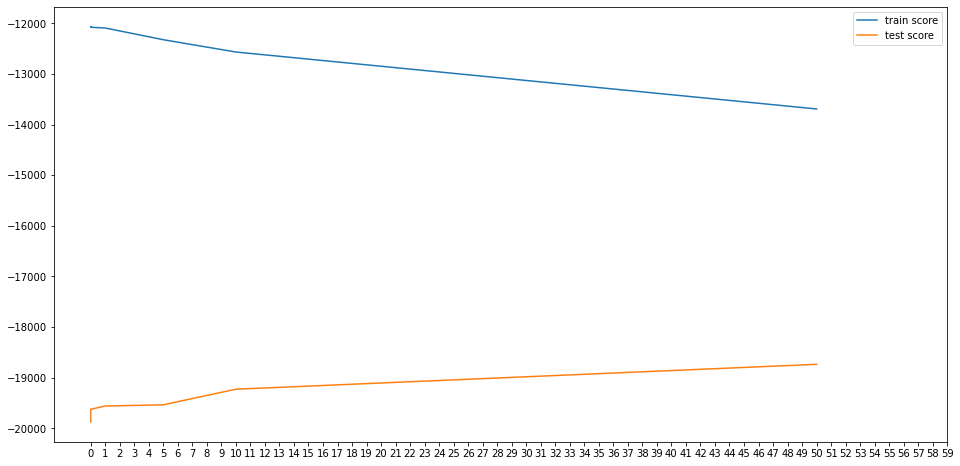

In [134]:
# plot a graph between mean test values and train scores with alpha Lasso

CV_values_lasso['param_alpha'] = CV_values_lasso['param_alpha'].astype('int32')

plt.figure(figsize=(16,8))

plt.plot(CV_values_lasso['param_alpha'], CV_values_lasso['mean_train_score'])  #alpha vs mean train score values
plt.plot(CV_values_lasso['param_alpha'], CV_values_lasso['mean_test_score'])   #alpha vs mean test score values

plt.legend(['train score', 'test score'], loc='upper right')

plt.xticks(np.arange(0, 60, 1))
plt.show()

In [135]:
#alpha value is again found to be 1 

lasso = Lasso(alpha=1)

lasso.fit(X_train, y_train)
#lasso.coef_

Lasso(alpha=1)

optimal alpha value is 1

In [136]:
#find r2 value for train data set for predictors
y_train_pred_L = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_L))

#find r2 value for train data set for predictors
y_test_pred_L = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_L))

0.9382116122566216
0.8394038511358768


In [137]:
#performing this step to answer subjective questions for doubling alpha values 

lasso = Lasso(alpha=2)

lasso.fit(X_train, y_train)
#lasso.coef_

Lasso(alpha=2)

In [138]:
#find r2 value for train data set for predictors
y_train_pred_L = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_L))

#find r2 value for train data set for predictors
y_test_pred_L = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_L))

0.938185346755983
0.8302399945894203


In [139]:
#list model parameters to find best describing features

ridge_coefs = list(ridge.coef_)
ridge_coefs.insert(0,ridge.intercept_)
ridge_coefs = [round(x, 2) for x in ridge_coefs]

colms = X.columns
colms.insert(0,'constant')

ridge_coefficients = list(zip(colms,ridge_coefs))

ridge_coefficients

[('MSSubClass', 168069.02),
 ('LotArea', -7443.99),
 ('OverallQual', 4168.42),
 ('OverallCond', 15405.61),
 ('YearBuilt', 4888.58),
 ('YearRemodAdd', 6045.04),
 ('BsmtFinSF1', 2276.54),
 ('BsmtFinSF2', -353.47),
 ('BsmtUnfSF', 767.98),
 ('TotalBsmtSF', 189.64),
 ('1stFlrSF', 85.07),
 ('2ndFlrSF', 2798.41),
 ('LowQualFinSF', 12279.98),
 ('GrLivArea', 393.22),
 ('BsmtFullBath', 12286.45),
 ('BsmtHalfBath', 4962.18),
 ('FullBath', 148.66),
 ('HalfBath', 4398.17),
 ('BedroomAbvGr', 1942.84),
 ('KitchenAbvGr', -2739.91),
 ('TotRmsAbvGrd', -2562.1),
 ('Fireplaces', 7148.75),
 ('GarageCars', 4023.01),
 ('GarageArea', 10353.15),
 ('WoodDeckSF', -179.84),
 ('OpenPorchSF', 2607.8),
 ('EnclosedPorch', -1346.48),
 ('3SsnPorch', 568.47),
 ('ScreenPorch', 1805.38),
 ('PoolArea', 3258.8),
 ('MiscVal', 1810.31),
 ('MoSold', -802.62),
 ('YrSold', 2.08),
 ('MSZoning_FV', -55.98),
 ('MSZoning_RH', 5664.9),
 ('MSZoning_RL', -1560.02),
 ('MSZoning_RM', 2610.41),
 ('Street_Pave', -2081.85),
 ('Alley_No Alle

In [143]:
#list model parameter to find best describing features

lasso_coefs = list(lasso.coef_)
lasso_coefs.insert(0,lasso.intercept_)
lasso_coefs = [round(x, 3) for x in lasso_coefs]

colms = X_train.columns
colms.insert(0,'constant')

lasso_coefficients = list(zip(colms,lasso_coefs))

lasso_coefficients

[('MSSubClass', -1036775.348),
 ('LotArea', 2772.119),
 ('OverallQual', 7441.338),
 ('OverallCond', 10576.753),
 ('YearBuilt', 5610.357),
 ('YearRemodAdd', 9785.214),
 ('BsmtFinSF1', 2461.311),
 ('BsmtFinSF2', 11117.271),
 ('BsmtUnfSF', 2834.328),
 ('TotalBsmtSF', 4352.618),
 ('1stFlrSF', 5320.627),
 ('2ndFlrSF', 10482.137),
 ('LowQualFinSF', 21599.859),
 ('GrLivArea', -277.177),
 ('BsmtFullBath', 4206.942),
 ('BsmtHalfBath', 1727.37),
 ('FullBath', -129.844),
 ('HalfBath', 2237.195),
 ('BedroomAbvGr', 749.466),
 ('KitchenAbvGr', -3235.229),
 ('TotRmsAbvGrd', -3222.044),
 ('Fireplaces', 4565.779),
 ('GarageCars', 3827.887),
 ('GarageArea', 1939.579),
 ('WoodDeckSF', 6593.605),
 ('OpenPorchSF', 1824.615),
 ('EnclosedPorch', -568.889),
 ('3SsnPorch', 263.797),
 ('ScreenPorch', 1593.819),
 ('PoolArea', 2712.7),
 ('MiscVal', 98456.589),
 ('MoSold', -346.85),
 ('YrSold', -1026.802),
 ('MSZoning_FV', -116.941),
 ('MSZoning_RH', 20110.718),
 ('MSZoning_RL', 8688.136),
 ('MSZoning_RM', 13666.5

In [148]:
lasso_coefficients = pd.DataFrame(lasso_coefficients)

lasso_coefficients.sort_values(by=1,ascending=False)

,0,1
232,Fence_GdWo,1213994.196
226,GarageCond_TA,133375.825
223,GarageCond_Gd,117816.734
227,PavedDrive_P,116780.727
224,GarageCond_No Garage,115908.514
30,MiscVal,98456.589
214,GarageFinish_No Garage,62794.871
163,BsmtCond_TA,41512.282
75,Neighborhood_Timber,40470.558
108,RoofMatl_CompShg,37753.184


In [145]:
#ridge_coefficients = pd.DataFrame(ridge_coefficients)

#ridge_coefficients.sort_values(by=1,ascending=False)

After both the model features, following parameters can be better taken into consideration by the housing company

- BsmtUnfSF
- LotArea
- BsmtFinSF1
- MSSubClass
- TotalBsmtSF
- 1stFlrSF
- YearBuilt
- OverallQual
- YearRemodAdd
- OverallCond
- BsmtFinSF2

In [149]:
#dropping significant columns for lasso for subjective ques

X_train.drop(['BsmtUnfSF','LotArea','BsmtFinSF1','MSSubClass','TotalBsmtSF','1stFlrSF','YearBuilt','OverallQual','YearRemodAdd'
,'OverallCond','BsmtFinSF2'],axis=1,inplace=True)

In [150]:
folds_count = 5

CV_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds_count, 
                        return_train_score=True,
                        verbose = 1)    

CV_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=2),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10,
                                   50]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [151]:
#alpha value is again found to be 1 

lasso = Lasso(alpha=1)

lasso.fit(X_train, y_train)
#lasso.coef_

Lasso(alpha=1)

In [152]:
lasso_coefs = list(lasso.coef_)
lasso_coefs.insert(0,lasso.intercept_)
lasso_coefs = [round(x, 3) for x in lasso_coefs]

colms = X_train.columns
colms.insert(0,'constant')

lasso_coefficients = list(zip(colms,lasso_coefs))

lasso_coefficients

[('2ndFlrSF', -809402.917),
 ('LowQualFinSF', -2185.517),
 ('GrLivArea', -3063.324),
 ('BsmtFullBath', 33359.284),
 ('BsmtHalfBath', 3983.857),
 ('FullBath', 573.797),
 ('HalfBath', 3907.33),
 ('BedroomAbvGr', 1307.166),
 ('KitchenAbvGr', -3402.876),
 ('TotRmsAbvGrd', -4021.294),
 ('Fireplaces', 3506.807),
 ('GarageCars', 4943.096),
 ('GarageArea', 2703.776),
 ('WoodDeckSF', 6696.737),
 ('OpenPorchSF', 2056.785),
 ('EnclosedPorch', -167.73),
 ('3SsnPorch', -861.203),
 ('ScreenPorch', 1433.254),
 ('PoolArea', 2365.561),
 ('MiscVal', 84699.278),
 ('MoSold', 1364.635),
 ('YrSold', -893.434),
 ('MSZoning_FV', 298.051),
 ('MSZoning_RH', 24194.38),
 ('MSZoning_RL', 19333.059),
 ('MSZoning_RM', 21274.58),
 ('Street_Pave', 26852.708),
 ('Alley_No Alley', 15649.688),
 ('Alley_Pave', 899.604),
 ('LotShape_IR2', 20555.906),
 ('LotShape_IR3', 4256.316),
 ('LotShape_Reg', 21762.199),
 ('LandContour_HLS', 1129.121),
 ('LandContour_Low', 22925.579),
 ('LandContour_Lvl', 5430.225),
 ('Utilities_NoSeWa

In [154]:
lasso_coefficients = pd.DataFrame(lasso_coefficients)

lasso_coefficients.sort_values(by=1,ascending=False)

,0,1
221,Fence_GdWo,1012815.088
215,GarageCond_TA,172826.370
212,GarageCond_Gd,151801.953
216,PavedDrive_P,150763.250
213,GarageCond_No Garage,146842.282
203,GarageFinish_No Garage,142525.628
19,MiscVal,84699.278
64,Neighborhood_Timber,45289.134
119,Exterior2nd_Brk Cmn,43210.122
3,BsmtFullBath,33359.284
